In [6]:
# import packages
import scimap as sm
import anndata as ad
import numpy as np

In [9]:
adata= ad.read_h5ad("/dss/dsshome1/00/ge65tib2/Scimap/fresh_frozen_reg002_cellpose.h5ad")
adata = adata[:, adata.var_names != 'DAPI']
adata

View of AnnData object with n_obs × n_vars = 58005 × 9
    obs: 'centroid-0', 'centroid-1'
    obsm: 'spatial'

In [10]:
adata = sm.tl.cluster(adata, method='leiden', resolution=0.7, use_raw=False, log=False)


Leiden clustering


/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:383: ImplicitModificationWarning:

Setting element `.obsm['X_pca']` of view, initializing view as actual.

/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/cluster.py:342: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [11]:
adata.obs['leiden'].value_counts()


leiden
0     5369
1     4164
2     4155
3     4039
4     3986
5     3851
6     3735
7     3551
8     3414
9     3259
10    3122
11    2783
12    2450
13    2290
14    2068
15    1788
16    1711
17     855
18     764
19     651
Name: count, dtype: int64

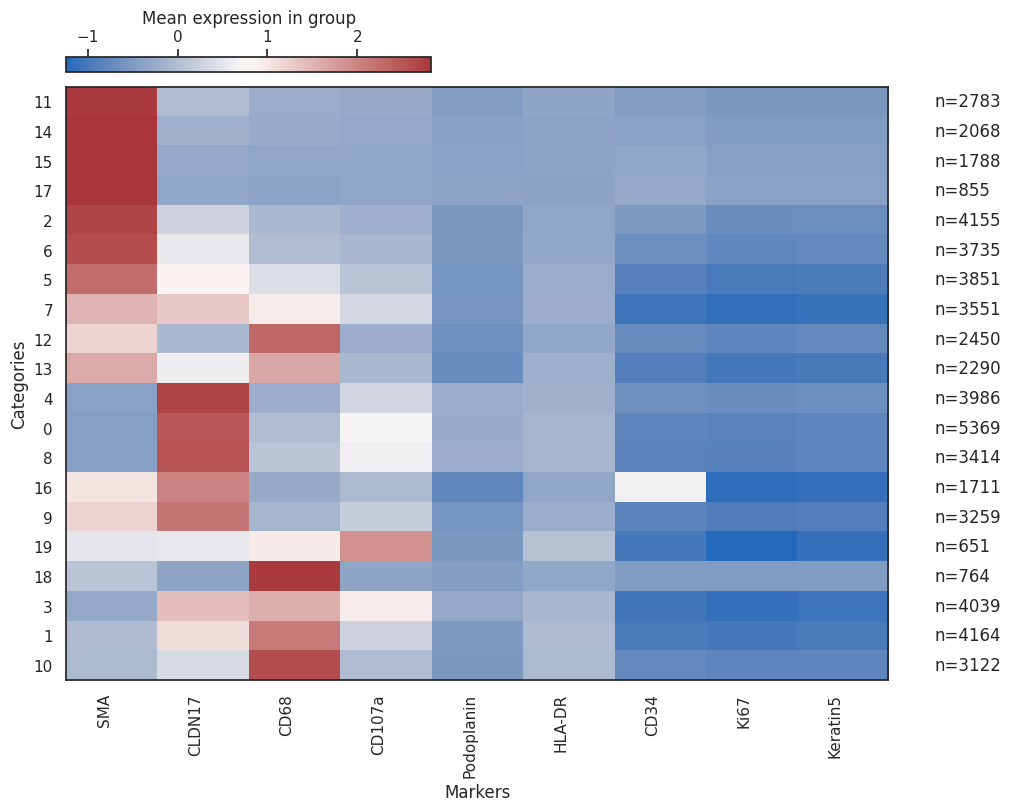

In [12]:
sm.pl.heatmap(adata, groupBy='leiden', standardScale='column', figsize=(10,8), showPrevalence=True)


In [13]:
rename_dict = {
    'myCAFs': ['2', '5', '6', '11', '14', '15', '17'],
    'classical tumor cells': ['0', '4', '7', '8', '9', '16'],
    'Macrophages': ['1', '3', '10', '12', '13', '18'],
    'CD8⁺ T cells or NK cells': ['19'],
}
adata = sm.hl.rename(adata, rename=rename_dict, from_column='leiden', to_column='leiden_phenotype')

Renaming 2 to myCAFs
Renaming 5 to myCAFs
Renaming 6 to myCAFs
Renaming 11 to myCAFs
Renaming 14 to myCAFs
Renaming 15 to myCAFs
Renaming 17 to myCAFs
Renaming 0 to classical tumor cells
Renaming 4 to classical tumor cells
Renaming 7 to classical tumor cells
Renaming 8 to classical tumor cells
Renaming 9 to classical tumor cells
Renaming 16 to classical tumor cells
Renaming 1 to Macrophages
Renaming 3 to Macrophages
Renaming 10 to Macrophages
Renaming 12 to Macrophages
Renaming 13 to Macrophages
Renaming 18 to Macrophages
Renaming 19 to CD8⁺ T cells or NK cells


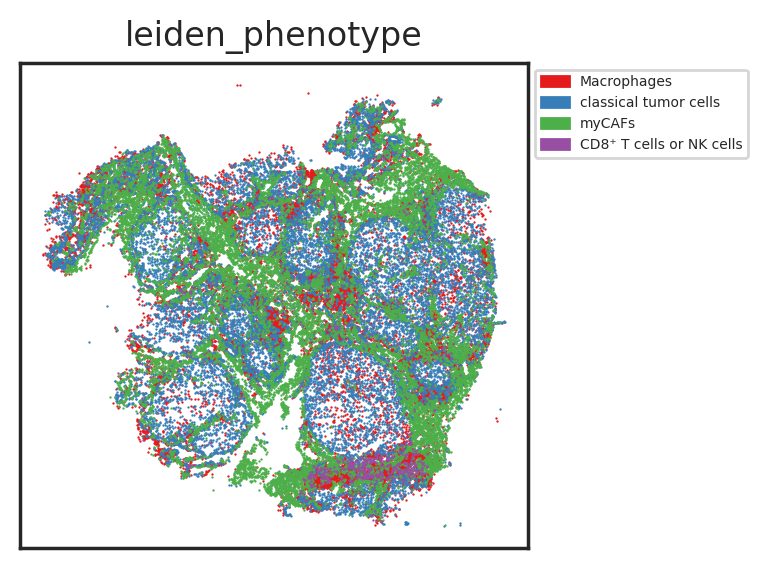

In [14]:
sm.pl.spatial_scatterPlot(
    adata,
    colorBy=['leiden_phenotype'],
    x_coordinate='centroid-0',
    y_coordinate='centroid-1',
    figsize=(4,3),
    s=0.7,
    fontsize=5,
    catCmap='Set1'
)


In [15]:
adata.write('/dss/dsshome1/00/ge65tib2/Scimap/fresh_frozen_reg002_after_clustering.h5ad')
